# FEATURE ENGINEERING

# STEP_1:
Import the csv dataset and load it as a pandas dataframe

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
#source of data --> 'https://www.kaggle.com/kingburrito666/shakespeare-plays/download'
dataframe_1 = pd.read_csv("Shakespeare_data.csv")
dataframe_1.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"


# STEP_2: DATA CLEANINING/PREPROCESSING
Remove all the records for which either of the PlayerLinenumber, ActSceneLine or Player is NaN

In [2]:
dataframe_1.dropna(axis=0, how = 'any',inplace = True)
dataframe_1.drop(['Dataline'], axis =1, inplace = True)
dataframe_1.head()

,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
3,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
6,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
7,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil


# STEP_3: FEATURE ENGINEERING

Task: To classify the plays into categories of 16th Century Play or 17th Century Play.

Step 3.1: Get all the unique values of the Plays (from the 'Play' Column)

Step 3.2: Create a new custom feature called 'Year' using the function create_year_of_play() and applying it on the 'Play' feature/column using apply() method.

Step 3.3: Write a function period_of_play() to classify the plays into categories of four periods of Shakespeares' plays. This function is applied on the newly developed custom feature 'Year'.

Step 3.4: Write a function century_of_play() to classify the plays into categories of century. This function is applied on the newly developed custom feature 'Year'.


In [3]:
#Step_1
print(dataframe_1.Play.unique())

['Henry IV' 'Henry VI Part 1' 'Henry VI Part 2' 'Henry VI Part 3'
 'Alls well that ends well' 'As you like it' 'Antony and Cleopatra'
 'A Comedy of Errors' 'Coriolanus' 'Cymbeline' 'Hamlet' 'Henry V'
 'Henry VIII' 'King John' 'Julius Caesar' 'King Lear' 'Loves Labours Lost'
 'macbeth' 'Measure for measure' 'Merchant of Venice'
 'Merry Wives of Windsor' 'A Midsummer nights dream'
 'Much Ado about nothing' 'Othello' 'Pericles' 'Richard II' 'Richard III'
 'Romeo and Juliet' 'Taming of the Shrew' 'The Tempest' 'Timon of Athens'
 'Titus Andronicus' 'Troilus and Cressida' 'Twelfth Night'
 'Two Gentlemen of Verona' 'A Winters Tale']


In [4]:
#Step_2
def create_year_of_play(x):
    if x == 'Henry IV':
        return 1600
    elif x == 'Henry VI Part 1':
        return 1591
    elif x == 'Henry VI Part 2':
        return 1595
    elif x == 'Henry VI Part 3':
        return 1595 
    elif x == 'Alls well that ends well':
        return 1623
    elif x == 'As you like it' :
        return 1603
    elif x == 'Antony and Cleopatra':
        return 1606
    elif x == 'A Comedy of Errors' :
        return 1594
    elif x == 'Cymbeline':
        return 1611
    elif x == 'Coriolanus':
        return 1609
    elif x == 'Hamlet':
        return 1609
    elif x == 'Henry V':
        return 1599
    elif x == 'Henry VIII':
        return 1613
    elif x == 'King John':
        return 1523
    elif x == 'Julius Caesar':
        return 1599
    elif x == 'King Lear':
        return 1606
    elif x == 'Loves Labours Lost':
        return 1597
    elif x == 'macbeth':
        return 1606
    elif x == 'Measure for measure':
        return 1604
    elif x == 'Merchant of Venice':
        return 1605
    elif x == 'Merry Wives of Windsor':
        return 1597
    elif x == 'A Midsummer nights dream':
        return 1605
    elif x == 'Much Ado about nothing':
        return 1596
    elif x == 'Othello':
        return 1611
    elif x == 'Pericles':
        return 1611
    elif x == 'Richard II':
        return 1597
    elif x == 'Richard III':
        return 1633
    elif x == 'Romeo and Juliet':
        return 1599
    elif x == 'Taming of the Shrew':
        return 1596
    elif x == 'The Tempest':
        return 1511
    elif x == 'Titus Andronicus':
        return 1594
    elif x == 'Troilus and Cressida':
        return 1601
    elif x == 'Twelfth Night':
        return 1602
    elif x == 'Two Gentlemen of Verona':
        return 1590
    elif x == 'A Winters Tale':
        return 1611

def period_of_play(x):
    if x<1595:
        return 'Early Period'
    elif x>=1595 and x<=1601:
        return 'Balance Period'
    elif x>=1602 and x<=1608:
        return 'Overflowing Period'
    elif x>1608:
        return 'Final Period'

#Step_3
def century_of_play(x):
    if x<1600:
        return 16
    else:
        return 17
    
dataframe_1['Year'] = dataframe_1.Play.apply(create_year_of_play)
dataframe_1['Period']= dataframe_1.Year.apply(period_of_play)
dataframe_1['Century']= dataframe_1.Year.apply(century_of_play)
dataframe_1.head()

,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,Year,Period,Century
3,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,",1600.0,Balance Period,17
4,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,",1600.0,Balance Period,17
5,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils,1600.0,Balance Period,17
6,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.,1600.0,Balance Period,17
7,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil,1600.0,Balance Period,17


# STEP_4: Get Data insights after feature engineering

# 1. Plays per year

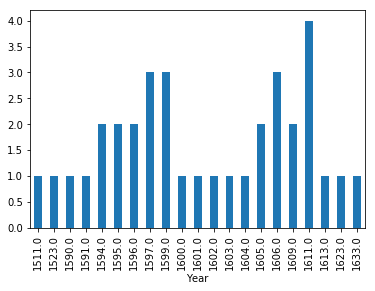

In [5]:
dataframe_1.groupby('Year')['Play'].nunique().plot(kind = 'bar')

# 2. Plays per period of writing

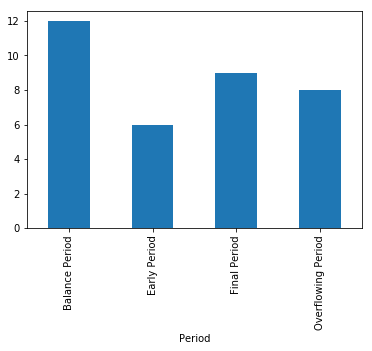

In [6]:
dataframe_1.groupby('Period')['Play'].nunique().plot(kind = 'bar')

# 3. Players/Actors/Characters per play
Quick Question: How many players were there per play?

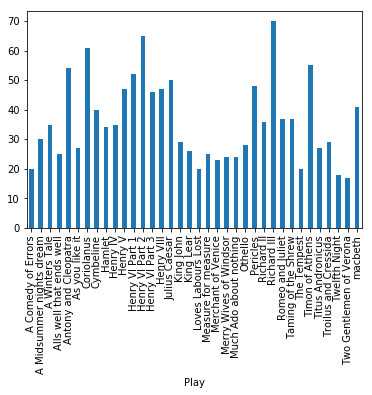

In [7]:
dataframe_1.groupby('Play')['Player'].nunique().plot(kind = 'bar')

# 4. Characters in most number of scenes, ordered by period of writing

In [8]:
dataframe_1.groupby(['Period','Player'])['ActSceneLine'].nunique().sort_values(ascending=False).head()

Period          Player      
Final Period    HAMLET          1496
                IAGO            1099
Balance Period  KING HENRY V    1029
                FALSTAFF        1011
Final Period    OTHELLO          887
Name: ActSceneLine, dtype: int64

# CLASSIFICATION ON SAME DATA


Applying Classification Techniques on the same data but loaded into different Data Frame

In [9]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
#source of data --> 'https://www.kaggle.com/kingburrito666/shakespeare-plays/download'
dataframe_2 = pd.read_csv("Shakespeare_data.csv")
dataframe_2.dropna(axis=0, how = 'any',inplace = True)
dataframe_2.drop(['Dataline'], axis =1, inplace = True)
dataframe_2.head()
#dataframe_2 is different from dataframe_1. 
#dataframe_1 was used for feature engineering and data analysis after applying feature engineering
#dataframe_2 will be used for classification using Naive Bayes and Logistic Regression

,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
3,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
6,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
7,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil


In [10]:
#Labeling of Players
players = dataframe_2.Player.unique()
k=0
player_label = dict()
for player in players:
    player_label[player]=k
    k=k+1
dataframe_2=dataframe_2.replace({"Player": player_label})

In [11]:
#Tokenizing the text
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(dataframe_2.PlayerLine).toarray()
features.shape

(105152, 10568)

In [12]:
#Player Line is the data and Player is the Classification
X_train, X_test, y_train, y_test = train_test_split(dataframe_2.PlayerLine, dataframe_2.Player, random_state=1)

In [13]:
# Classification using Naive Byes
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
classified_NB = MultinomialNB().fit(X_train_tfidf, y_train)

In [14]:
# Run Testing and print accuracy
CNB_Score=classified_NB.score(count_vect.transform(X_test), y_test)
CNB_Score

0.03092665855143031

In [15]:
#Classification using Logistic Regression
from sklearn.linear_model import LogisticRegression
classified_LogReg = LogisticRegression().fit(X_train_tfidf, y_train)
CLR_Score=classified_LogReg.score(count_vect.transform(X_test), y_test)
CNB_ScoreCNB_Score

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.055538648813146685

In [16]:
#Classification using Random Forest
from sklearn.ensemble import RandomForestClassifier
classified_RandomForest = RandomForestClassifier().fit(X_train_tfidf, y_train)
CRF_Score=classified_RandomForest.score(count_vect.transform(X_test), y_test)
CRF_Score

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.035529519172245894

# Accuracy Results


# Naive Bayes = 30.9%

# Logistic Regression = 55.55%

# Random Forest = 35.52%